In [124]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

In [125]:
def plot_results(census, un, timeseries, title):
    """Plot the estimates and the model.
    
    census: TimeSeries of population estimates
    un: TimeSeries of population estimates
    timeseries: TimeSeries of simulation results
    title: string
    """
    plot(census, ':', label='US Census')
    plot(un, '--', label='UN DESA')
    plot(timeseries, color='gray', label='model')
    
    decorate(xlabel='Year', 
             ylabel='World population (billion)',
             title=title)

In [126]:
def run_simulation(system, update_func):
    """Simulate the system using any update function.
    
    system: System object
    update_func: function that computes the population next year
    
    returns: TimeSeries
    """
    results = TimeSeries()
    results[system.t_0] = system.p_0
    
    for t in linrange(system.t_0, system.t_end):
        results[t+1] = update_func(results[t], t, system)
        
    return results

In [127]:
def read_table2(filename = 'data/World_population_estimates.html'):
    tables = pd.read_html(filename, header=0, index_col=0, decimal='M')
    table2 = tables[2]
    table2.columns = ['census', 'prb', 'un', 'maddison', 
                  'hyde', 'tanton', 'biraben', 'mj', 
                  'thomlinson', 'durand', 'clark']
    return table2

In [128]:
#table2 = read_table2()
#table2.to_csv('data/World_population_estimates2.csv')

In [129]:
table2 = pd.read_csv("C:/Users/Chafiaa/Downloads/World_population_estimates2.csv")
table2.index = table2.Year
table2.head()

,Year,census,prb,un,maddison,hyde,tanton,biraben,mj,thomlinson,durand,clark
Year,,,,,,,,,,,,
1950,1950,2557628654,2.516000e+09,2.525149e+09,2.544000e+09,2.527960e+09,2.400000e+09,2.527000e+09,2.500000e+09,2.400000e+09,NaN,2.486000e+09
1951,1951,2594939877,NaN,2.572851e+09,2.571663e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1952,1952,2636772306,NaN,2.619292e+09,2.617949e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1953,1953,2682053389,NaN,2.665865e+09,2.665959e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1954,1954,2730228104,NaN,2.713172e+09,2.716927e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN


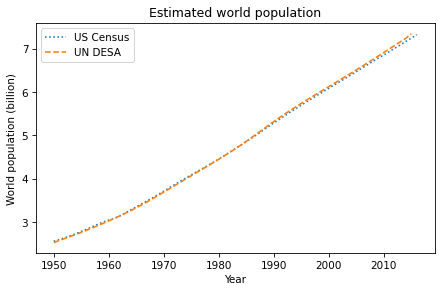

In [130]:
from matplotlib.pyplot import *
un = table2.un / 1e9
census = table2.census / 1e9
plot(census, ':', label='US Census')
plot(un, '--', label='UN DESA')
    
decorate(xlabel='Year', 
             ylabel='World population (billion)',
             title='Estimated world population')

In [131]:
def update_func_quad(pop, t, system):
    """Update population based on a quadratic model.
    
    pop: current population in billions
    t: what year it is
    system: system object with model parameters
    """
    net_growth = system.alpha * pop + system.beta * pop**2
    return pop + net_growth

In [132]:
t_0 = census.index[0]
t_end = census.index[-1]
p_0 = census[t_0]

2.557628654

In [133]:
system = System(t_0=t_0, 
                t_end=t_end,
                p_0=p_0,
                alpha=0.025,
                beta=-0.0018)

namespace(t_0=1950, t_end=2016, p_0=2.557628654, alpha=0.025, beta=-0.0018)

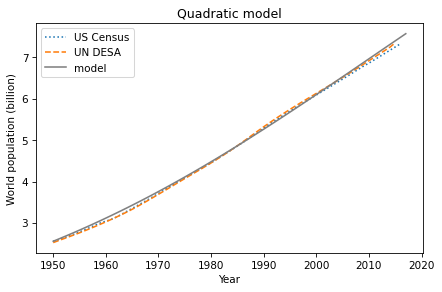

In [134]:
results = run_simulation(system, update_func_quad)
plot_results(census, un, results, 'Quadratic model')

FileNotFoundError: [Errno 2] No such file or directory: 'figs/chap08-fig01.pdf'

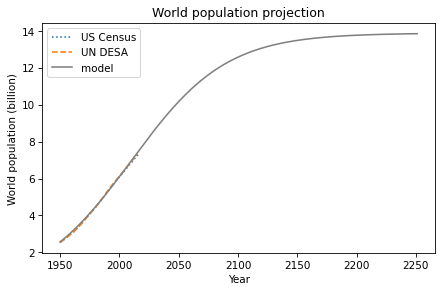

In [135]:
system.t_end = 2250
results = run_simulation(system, update_func_quad)
plot_results(census, un, results, 'World population projection')
savefig('figs/chap08-fig01.pdf')

In [ ]:
results[system.t_end]

In [ ]:
-system.alpha / system.beta

In [ ]:
#Exercise:
system.t_end = 2250 #to project until 2250
p0_array = linspace(1, 20, 20) #starting population from 1 to 20
for system.p_0 in p0_array:
    results = run_simulation(system, update_func_quad)
    plot(results)
    
decorate(xlabel='Year',
         ylabel='Population (billions)',
         title='Projections with hypothetical starting populations')


In [ ]:
def read_table3(filename = 'data/World_population_estimates.html'):
    tables = pd.read_html(filename, header=0, index_col=0, decimal='M')
    table3 = tables[3]
    table3.columns = ['census', 'prb', 'un']
    return table3

In [136]:
#table3 = read_table3()
#table3.to_csv('data/World_population_estimates3.csv')

In [137]:
table3 = pd.read_csv("C:/Users/Chafiaa/Downloads/World_population_estimates3.csv")
table3.index = table3.Year
table3.head()

,Year,census,prb,un
Year,,,,
2016,2016,7.334772e+09,NaN,7.432663e+09
2017,2017,7.412779e+09,NaN,NaN
2018,2018,7.490428e+09,NaN,NaN
2019,2019,7.567403e+09,NaN,NaN
2020,2020,7.643402e+09,NaN,7.758157e+09


In [138]:
def plot_projections(table):
    """Plot world population projections.
    
    table: DataFrame with columns 'un' and 'census'
    """
    census_proj = table.census / 1e9
    un_proj = table.un / 1e9
    
    plot(census_proj.dropna(), ':', color='C0', label='US Census')
    plot(un_proj.dropna(), '--', color='C1', label='UN DESA')

In [139]:
system = System(t_0=t_0, 
                t_end=2100,
                p_0=p_0,
                alpha=0.025,
                beta=-0.0018)

namespace(t_0=1950, t_end=2100, p_0=2.557628654, alpha=0.025, beta=-0.0018)

FileNotFoundError: [Errno 2] No such file or directory: 'figs/chap08-fig02.pdf'

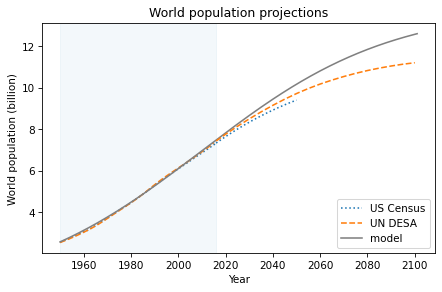

In [140]:
results = run_simulation(system, update_func_quad)

plt.axvspan(1950, 2016, color='C0', alpha=0.05)
plot_results(census, un, results, 'World population projections')
plot_projections(table3)
savefig('figs/chap08-fig02.pdf')

In [158]:
#Exercises: 

# import functions from the modsim.py module
from modsim import *

In [160]:
def alpha_func(t):
    intercept = 0.02
    slope = -0.00023
    return intercept + slope * (t - 1970)

NameError: name 'alpha_census' is not defined

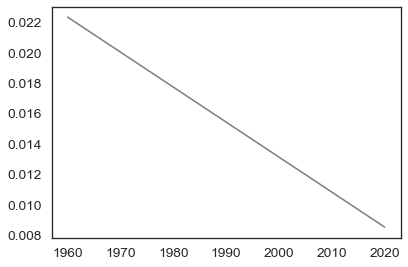

In [161]:
# Call the function

ts = linrange(1960, 2020)
alpha_model = TimeSeries(alpha_func(ts), ts)
plot(alpha_model, color='gray', label='model')
plot(alpha_census)
plot(alpha_un)

decorate(xlabel='Year', ylabel='Net growth rate')

In [162]:
t_0 = 1960
t_end = 2100
p_0 = census[t_0]

3.043001508

In [163]:
system = System(t_0=t_0, 
                t_end=t_end,
                p_0=p_0,
                alpha_func=alpha_func)

namespace(t_0=1960,
          t_end=2100,
          p_0=3.043001508,
          alpha_func=<function __main__.alpha_func(t)>)

In [164]:
def update_func_alpha(pop, t, system): #Updates population based on a quadratic model.
  
    net_growth = system.alpha_func(t) * pop
    return pop + net_growth

In [165]:
update_func_alpha(p_0, t_0, system)

3.1108604416284003

In [166]:
results = run_simulation(system, update_func_alpha);

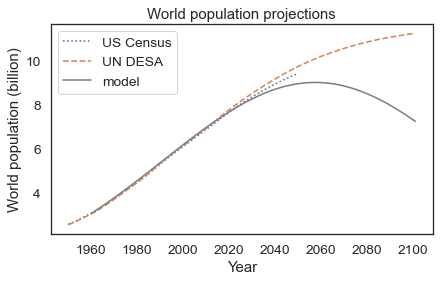

In [167]:
plot_results(census, un, results, 'World population projections')
plot_projections(table3)